Name:-Yash solanki

Reg email id:-yash87015@gmail.com

Course name:-Data analytic

Assignment name:-  Boosting Techniques assignment.

Submission date:-17/3/2025

Git link:-https://github.com/Yash87015/YASH (in git hub use assignment folder )

# Theoretical



## Q1: What is Boosting in Machine Learning?  
**Ans**  
Boosting is an ensemble learning technique where multiple weak models (usually decision trees) are combined to create a strong predictive model. It focuses on correcting the errors of previous models by giving more weight to misclassified instances.



## Q2: How does Boosting differ from Bagging?  
**Ans**  
- Boosting: Models are built sequentially, with each new model correcting the mistakes of the previous one.  
- Bagging: Models are built independently in parallel and combined through averaging or voting.



## Q3: What is the key idea behind AdaBoost?  
**Ans**  
- AdaBoost (Adaptive Boosting) combines weak classifiers, giving more weight to misclassified instances. It builds models sequentially, adjusting the weight of data points based on previous model errors.



## Q4: Explain the working of AdaBoost with an example.  
**Ans**  
1. Train a weak classifier on the data.  
2. Increase the weights of misclassified instances.  
3. Train a new model on the adjusted dataset.  
4. Repeat steps 2 and 3, and combine the models based on weighted voting.

Example: AdaBoost could be used to improve decision tree performance in spam email classification by giving higher importance to emails that were incorrectly classified in previous iterations.


## Q5: What is Gradient Boosting, and how is it different from AdaBoost?  
**Ans**  
- Gradient Boosting builds models sequentially, but instead of re-weighting misclassified instances, it minimizes a loss function by fitting new models to the residuals of the previous model. AdaBoost focuses on adjusting instance weights, while Gradient Boosting focuses on reducing the model's residual errors.



## Q6: What is the loss function in Gradient Boosting?  
**Ans**  
- The loss function in Gradient Boosting is typically a differentiable function (e.g., Mean Squared Error for regression) that measures how well the model performs. The goal is to minimize this loss by adjusting the model in each iteration.



## Q7: How does XGBoost improve over traditional Gradient Boosting?  
**Ans**  XGBoost improves Gradient Boosting by introducing:  
- Regularization to prevent overfitting.  
- Tree pruning for better model complexity.  
- Handling missing values more effectively.  
- Parallelization for faster training.



## Q8: What is the difference between XGBoost and CatBoost?  
**Ans**  
- XGBoost: More flexible, requires manual tuning of categorical variables.  
- CatBoost: Automatically handles categorical variables, reducing preprocessing time and complexity.



## Q9: What are some real-world applications of Boosting techniques?  
**Ans**  
- Credit scoring: Predicting the likelihood of loan default.  
- Spam detection: Identifying spam emails.  
- Medical diagnosis: Classifying diseases from medical records.  
- Marketing: Predicting customer churn and targeting ads.


## Q10: How does regularization help in XGBoost?  
**Ans**  
Regularization in XGBoost helps to control model complexity, reducing overfitting. It does this by penalizing large coefficients and promoting simpler models.



## Q11: What are some hyperparameters to tune in Gradient Boosting models?  
**Ans**  
- Learning rate: Controls the contribution of each tree.  
- Number of estimators: Number of trees to build.  
- Max depth: Maximum depth of each tree.  
- Min samples split: Minimum number of samples required to split an internal node.



## Q12: What is the concept of Feature Importance in Boosting?  
**Ans**  
- Feature importance refers to the contribution of each feature in making predictions. In Boosting models, features that contribute more to reducing the error are given higher importance.



## Q13: Why is CatBoost efficient for categorical data?  
**Ans**  
- CatBoost uses an efficient algorithm that automatically handles categorical features by encoding them in a way that reduces overfitting, requiring less preprocessing compared to other algorithms.




In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [ ]:
#import require library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris,load_wine,load_breast_cancer,fetch_california_housing,load_diabetes
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, roc_auc_score, precision_score, recall_score, f1_score,mean_absolute_error

# Practical

## Q14. Train an AdaBoost Classifier on a sample dataset and print model accuracy?
**Ans**

In [ ]:
from ast import mod
# load same dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# x and y
x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#adaboostclf
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9333333333333333


## 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)?
**Ans**

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#adaboost regressor
model = AdaBoostRegressor(n_estimators=50, random_state=42,learning_rate=0.1,loss='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"r2_score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.5854034386560143
r2_score: 0.5710090066389739


## Q16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance?
**Ans**

In [ ]:
data = load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

x=df.drop('target',axis=1)
y=df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#gradiant boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Feature Importance: {model.feature_importances_}")


Accuracy: 0.956140350877193
Feature Importance: [1.29234808e-05 2.78045836e-02 2.01183642e-04 4.25403304e-04
 2.46660446e-03 2.99604699e-03 9.22233287e-04 4.50527588e-01
 5.19940461e-04 1.06691601e-04 6.87020789e-03 3.60401381e-03
 1.15680237e-03 8.41527251e-03 5.56452892e-04 2.51063498e-03
 1.30679228e-02 2.03810848e-03 7.02862580e-04 4.22393330e-03
 7.55888752e-02 3.98864800e-02 5.14082111e-02 3.82446946e-02
 4.81083076e-03 4.50121585e-04 1.87249757e-02 2.40103086e-01
 1.47800843e-03 1.75306929e-04]


## Q17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score?
**Ans**

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#grading bossting regressor
model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

R-squared Score: 0.7756433164710084
Mean Absolute Error: 0.37165044848436773


## Q18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting?
**Ans**

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#train tests split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#xgboost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

#predict
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#gradiant boosting classifier
model_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_2.fit(x_train, y_train)

#predict
y_pred = model_2.predict(x_test)
accuracy_2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_2}")

#compare
if accuracy > accuracy_2:
    print("XGBoost Classifier performs better.")
else:
    print("Gradient Boosting Classifier performs better.")


Accuracy: 0.9722222222222222
Accuracy: 0.9444444444444444
XGBoost Classifier performs better.


## Q19. Train a CatBoost Classifier and evaluate using F1-Score?
**Ans**

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#catboost classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, loss_function='MultiClass', random_state=42)
model.fit(x_train, y_train)

#predict
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

0:	learn: 0.9980319	total: 886us	remaining: 87.7ms
1:	learn: 0.8930238	total: 1.78ms	remaining: 87.1ms
2:	learn: 0.8162464	total: 2.84ms	remaining: 91.7ms
3:	learn: 0.7598665	total: 3.69ms	remaining: 88.4ms
4:	learn: 0.7038791	total: 4.38ms	remaining: 83.1ms
5:	learn: 0.6462894	total: 9.81ms	remaining: 154ms
6:	learn: 0.6019646	total: 10.7ms	remaining: 143ms
7:	learn: 0.5496939	total: 11.7ms	remaining: 135ms
8:	learn: 0.5120422	total: 12.6ms	remaining: 128ms
9:	learn: 0.4796436	total: 20.7ms	remaining: 186ms
10:	learn: 0.4533298	total: 21.8ms	remaining: 177ms
11:	learn: 0.4232918	total: 22.8ms	remaining: 167ms
12:	learn: 0.3967263	total: 23.7ms	remaining: 159ms
13:	learn: 0.3769460	total: 24.5ms	remaining: 150ms
14:	learn: 0.3542385	total: 25.3ms	remaining: 143ms
15:	learn: 0.3329196	total: 26.3ms	remaining: 138ms
16:	learn: 0.3118614	total: 27.3ms	remaining: 133ms
17:	learn: 0.2951569	total: 30.5ms	remaining: 139ms
18:	learn: 0.2805214	total: 39.8ms	remaining: 170ms
19:	learn: 0.26710

In [ ]:
#classificacation report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Q20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)?
**Ans**

In [ ]:
from sklearn import datasets
data = datasets.fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#xgboost regressor
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

#predict
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2 score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 0.29522676196268116
r2 score: 0.7747063955872805


## Q21. Train an AdaBoost Classifier and visualize feature importance?
**Ans**

Accuracy: 0.9444444444444444
Feature Importance: [0.17962458 0.         0.         0.         0.         0.
 0.47231733 0.         0.         0.13400472 0.05105083 0.04898639
 0.11401615]


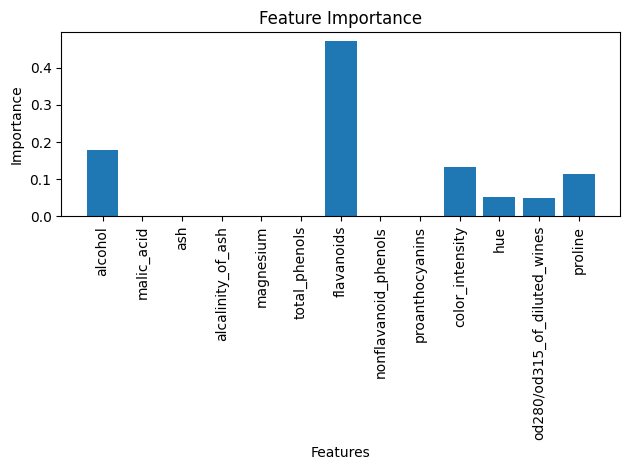

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#adaboost clf
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#evalution
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#feature importance
feature_importance = model.feature_importances_
print(f"Feature Importance: {feature_importance}")

#visualize feature importance
import matplotlib.pyplot as plt
plt.bar(data.feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Q22. Train a Gradient Boosting Regressor and plot learning curves?
**Ans**

Test MSE: 0.2378


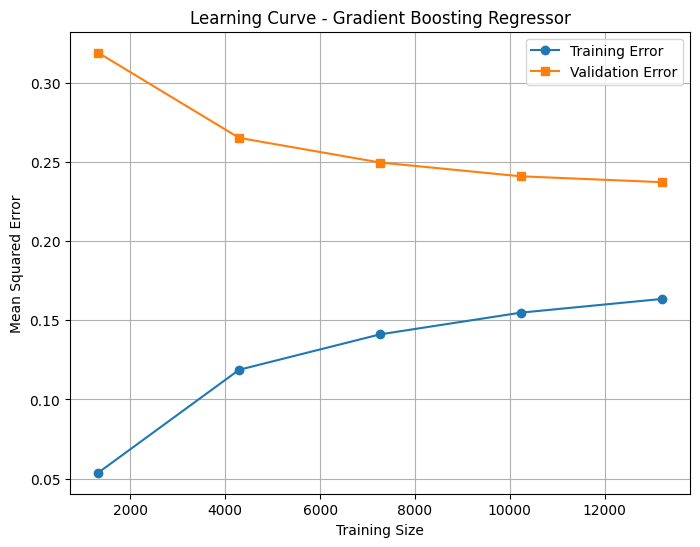

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)

# Train model
gb_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(gb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Compute mean and std deviation
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Error", marker='s')
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve - Gradient Boosting Regressor")
plt.legend()
plt.grid()
plt.show()


## Q23. Train an XGBoost Classifier and visualize feature importance?
**Ans**

Accuracy: 0.9722222222222222
Feature Importance: [0.0118808  0.03216758 0.00986664 0.00440199 0.02501612 0.01592019
 0.10094967 0.00409993 0.00175859 0.13861522 0.00842555 0.53264725
 0.11425051]


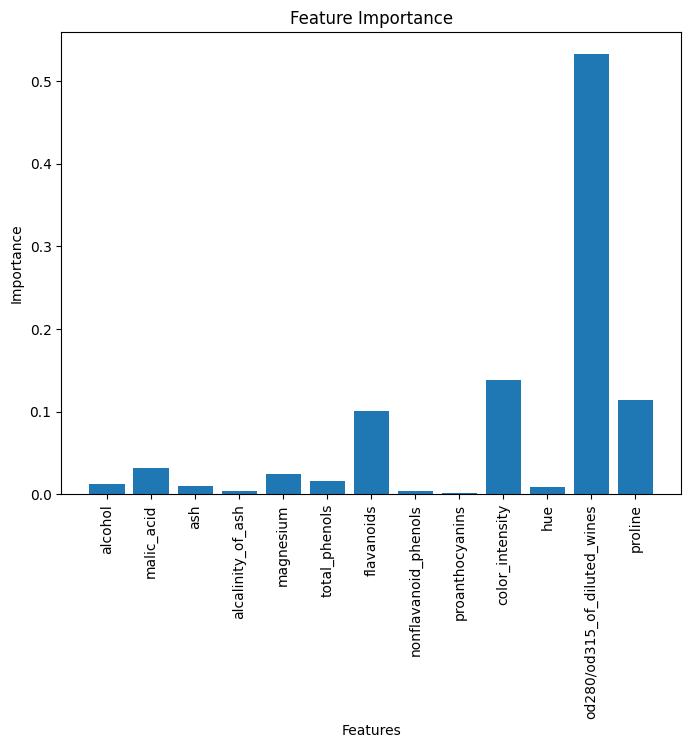

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#xgboost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)
#predict
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#feature importance
feature_importance = model.feature_importances_
print(f"Feature Importance: {feature_importance}")

#visualize
plt.figure(figsize=(8, 6))
plt.bar(data.feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

## Q24.Train a CatBoost Classifier and plot the confusion matrix?
**Ans**

0:	learn: 0.9939844	total: 2.29ms	remaining: 227ms
1:	learn: 0.8980680	total: 4.58ms	remaining: 225ms
2:	learn: 0.8222667	total: 5.47ms	remaining: 177ms
3:	learn: 0.7562931	total: 6.39ms	remaining: 153ms
4:	learn: 0.7046785	total: 7.28ms	remaining: 138ms
5:	learn: 0.6510912	total: 11.2ms	remaining: 176ms
6:	learn: 0.6153028	total: 15.4ms	remaining: 204ms
7:	learn: 0.5741303	total: 16.5ms	remaining: 189ms
8:	learn: 0.5337960	total: 17.4ms	remaining: 175ms
9:	learn: 0.4995208	total: 18.2ms	remaining: 164ms
10:	learn: 0.4726575	total: 19ms	remaining: 154ms
11:	learn: 0.4438105	total: 20ms	remaining: 146ms
12:	learn: 0.4153862	total: 23.7ms	remaining: 159ms
13:	learn: 0.3937302	total: 25.9ms	remaining: 159ms
14:	learn: 0.3704956	total: 26.9ms	remaining: 153ms
15:	learn: 0.3487517	total: 27.8ms	remaining: 146ms
16:	learn: 0.3325481	total: 28.6ms	remaining: 140ms
17:	learn: 0.3161737	total: 29.5ms	remaining: 135ms
18:	learn: 0.2986489	total: 33.7ms	remaining: 144ms
19:	learn: 0.2844667	total

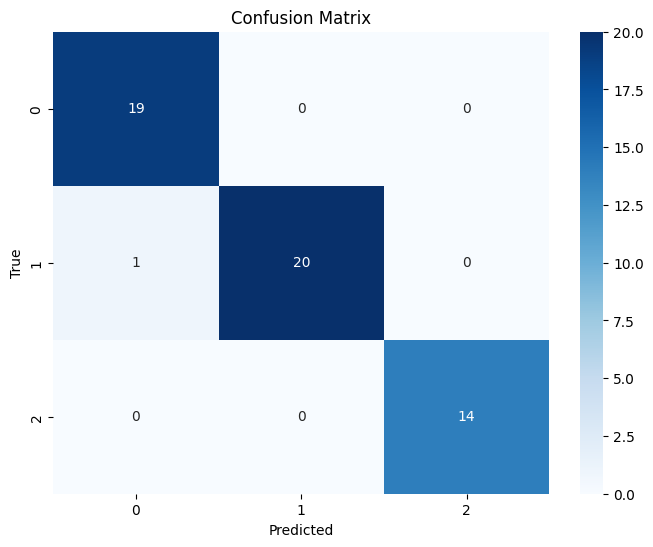

In [22]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, loss_function='MultiClass', random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

#plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Q25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy?
**Ans**

In [25]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Adaboost clf
estimators = [10,20,30,40,5, 50, 100, 200]
accuracies = []

for n_estimators in estimators:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Number of Estimators: {n_estimators}, Accuracy: {accuracy}")
    print(confusion_matrix(y_test, y_pred))

Number of Estimators: 10, Accuracy: 0.9649122807017544
[[40  3]
 [ 1 70]]
Number of Estimators: 20, Accuracy: 0.9736842105263158
[[40  3]
 [ 0 71]]
Number of Estimators: 30, Accuracy: 0.9649122807017544
[[40  3]
 [ 1 70]]
Number of Estimators: 40, Accuracy: 0.9649122807017544
[[40  3]
 [ 1 70]]
Number of Estimators: 5, Accuracy: 0.9649122807017544
[[39  4]
 [ 0 71]]
Number of Estimators: 50, Accuracy: 0.9649122807017544
[[40  3]
 [ 1 70]]
Number of Estimators: 100, Accuracy: 0.9736842105263158
[[41  2]
 [ 1 70]]
Number of Estimators: 200, Accuracy: 0.9736842105263158
[[41  2]
 [ 1 70]]


## Q26. Train a Gradient Boosting Classifier and visualize the ROC curve?
**Ans**

Accuracy: 0.9649122807017544


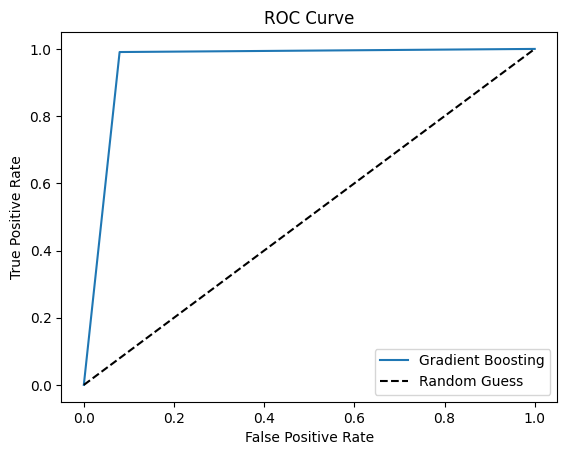

In [26]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

#gradiant bosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#accuracy
acuuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acuuracy}")

#roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Q27.Train an XGBoost Regressor and tune the learning rate using GridSearchCV?
**Ans**

In [30]:
data = fetch_california_housing()
df =  pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGboost regressor
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)

#gridserch cv
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid_search.fit(x_train, y_train)

#best parameter
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

#best score
best_score = grid_search.best_score_
print(f"Best Score: {best_score}")

#using best estimator buid final model
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2 score: {r2_score(y_test, y_pred)}")



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................learning_rate=0.01;, score=0.611 total time=   3.2s
[CV 2/5] END ................learning_rate=0.01;, score=0.619 total time=   0.9s
[CV 3/5] END ................learning_rate=0.01;, score=0.615 total time=   1.5s
[CV 4/5] END ................learning_rate=0.01;, score=0.610 total time=   0.5s
[CV 5/5] END ................learning_rate=0.01;, score=0.613 total time=   0.4s
[CV 1/5] END .................learning_rate=0.1;, score=0.836 total time=   0.4s
[CV 2/5] END .................learning_rate=0.1;, score=0.823 total time=   0.4s
[CV 3/5] END .................learning_rate=0.1;, score=0.833 total time=   0.4s
[CV 4/5] END .................learning_rate=0.1;, score=0.833 total time=   0.4s
[CV 5/5] END .................learning_rate=0.1;, score=0.825 total time=   0.4s
[CV 1/5] END .................learning_rate=0.2;, score=0.839 total time=   0.4s
[CV 2/5] END .................learning_rate=0.2;,

## Q28.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting?
**Ans**

In [35]:
#generate sythetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#model with without weight balaces
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, loss_function='Logloss', random_state=42,verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#model with class balace
model2 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, loss_function='Logloss', random_state=42, class_weights=[0.1,0.9],verbose=0)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy2}")

#compare
if accuracy > accuracy2:
    print("Model without class weights performs better.")
else:
    print("Model with class weights performs better.")




Accuracy: 0.95
Accuracy: 0.955
Model with class weights performs better.


## Q29.Train an AdaBoost Classifier and analyze the effect of different learning rates?
**Ans**

In [37]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#AdaBoost classifier
learning_rates = [0.01, 0.1, 1.0,1.2,1.5]
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy}")


Learning Rate: 0.01, Accuracy: 0.8611111111111112
Learning Rate: 0.1, Accuracy: 0.8888888888888888
Learning Rate: 1.0, Accuracy: 0.9444444444444444
Learning Rate: 1.2, Accuracy: 0.9444444444444444
Learning Rate: 1.5, Accuracy: 0.9166666666666666


## Q30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss?
**Ans**

In [43]:
#sythetic data
x,y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_clusters_per_class=1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

#  Convert Data to XGBoost DMatrix Format (Optional but Efficient)
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

#model
from xgboost import XGBClassifier
param = {'objective': 'multi:softmax', 'num_class': 4, 'max_depth': 3, 'learning_rate': 0.1}
model = XGBClassifier(**param)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import log_loss
y_pred_proba = model.predict_proba(x_test)
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss}")

Accuracy: 0.85
Log Loss: 0.4281148645529764
